
## FINANCIAL ECONOMETRICS
MODULE 3 | LESSON 2

---

# **Skew Normal Distribution and Skew-t Distribution** (part 2 in R)

|  |  |
|:---|:---|
|**Reading Time** |  minutes |
|**Prior Knowledge** |   |
|**Keywords** |  |


---

*Throughout in this course we use Python as a programming language to code examples and perform various computations. It has many well-developed packages that make the computation much smooth and easier with just a few lines of code. Python is general-purpose programming language but there are other programming languages that can be more suitable depending on the task and complexity that we are dealing with. One example is R programming language that has its roots in statistical analysis and has powerful libraries for data experiment and exploration. To explain the concepts in this second part of this lesson we opt to switch to R programming to showcase the examples in an efficient form without bringing in extra computational steps that we would otherwise need to have in Python.*

*This notebook still has familiar Jupyter notebook outlook so you can navigate in a same manner as you would navigate and run cells in any other Jupyter notebook. The only difference now is that the environment runs on R kernel and scripts in code cells are written in R programming language. Although there is a slight difference in syntaxis, the scripts present in this lesson should be intuitive enough to read and understand the mechanism of the simulations and examples given here.* 

In [39]:
# Import libraries
library(moments)
library(plyr)
library(sn)
library(stats)

options(jupyter.plot_scale=1.5) # plot size scaled

In [23]:
# Download the dataset
url <- 'https://raw.githubusercontent.com/teator/WQU-Financial-Econometrics-R/master/M3.%20bond_and_stock_data.csv'
data_set <- read.csv(file = url, header=TRUE, stringsAsFactors = FALSE)


### **4.2 U.S. 10-Year Treasury Bond Yield Daily Return and Skew-Normal Distribution**

We talked about the basics of skew-normal distribution in the last section. Now let’s apply this method to our U.S. 10-Year Treasury Bond Yield Daily Return data. The data spans from the beginning of 2016 to the end of 2021. Here are some statistics from the data.


**Figure 5: Key Statistics for U.S. 10-Year Treasury Bond Yield Daily Return**

In [24]:
# Key Statistics for U.S. 10-Year Treasury Bond Yield Daily Return

print(paste("Mean               : ", mean(data_set$X10Y_TBY)))
print(paste("Standard Deviation : ", sd(data_set$X10Y_TBY)))
print(paste("Skewness           : ", skewness(data_set$X10Y_TBY)))
print(paste("Kurtosis           :", kurtosis(data_set$X10Y_TBY)))


[1] "Mean               :  0.000375165859986729"
[1] "Standard Deviation :  0.0361645194430715"
[1] "Skewness           :  2.03812552586669"
[1] "Kurtosis           : 42.7224876559722"


**Figure 6: QQ Plot Normal Distribution vs U.S. 10-Year Treasury Bond Yield Daily Return**


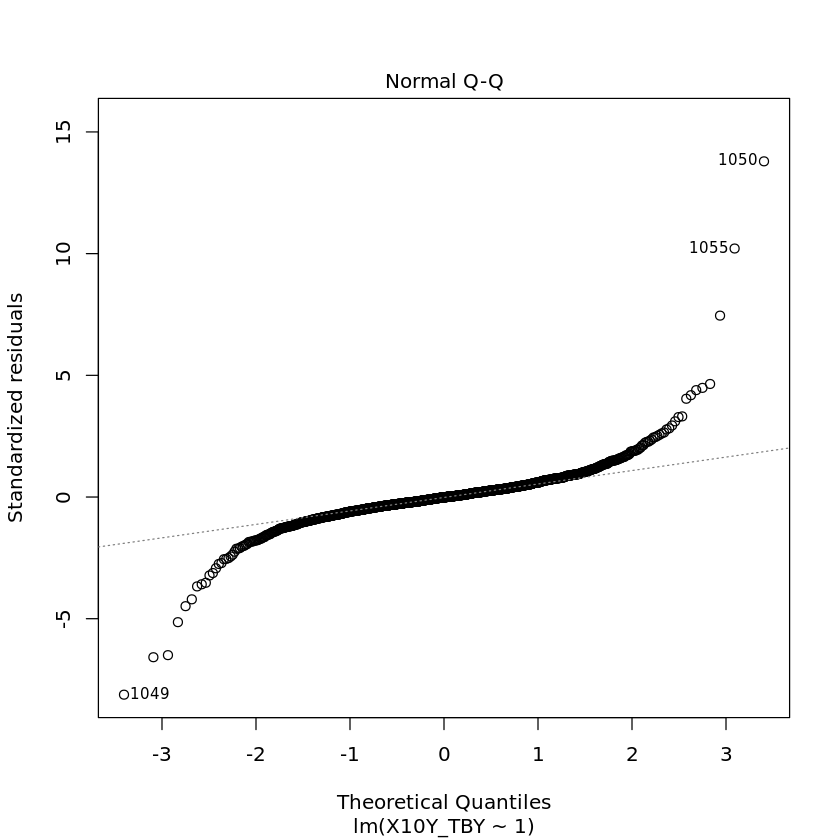

In [25]:
# QQ Plot Normal Distribution vs U.S. 10-Year Treasury Bond Yield Daily Return

# Fit regular OLS
X10Y_nfit <- lm(X10Y_TBY ~ 1, data=data_set)

# QQ plot of residuals
plot(X10Y_nfit, which=2)


From figure 5, we can see that the U.S. Treasury 10-Year Bond Yield daily return is skewed to the right and has a heavy tail. Figure 6 also shows the U.S. Treasury 10-Year Bond Yield daily return has heavy tails on both ends compared to a normal distribution. Hence, normal distribution is not a good choice to describe the variable. 

Now let’s try skew-normal distribution on the U.S. Treasury 10-Year Bond Yield daily return to see if the distribution fits the data. Figure 7 show the result.


**Figure 7: QQ Plot Skew-Normal Distribution vs U.S. Treasury 10-Year Bond Yield Daily Return**


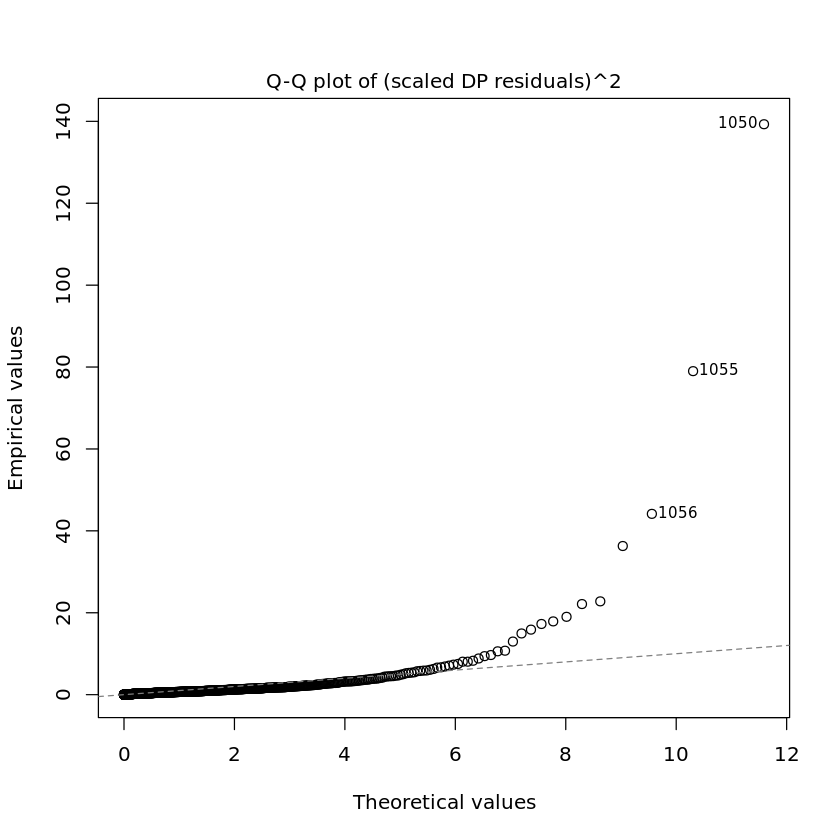

In [26]:
# QQ Plot Skew-Normal Distribution vs U.S. Treasury 10-Year Bond Yield Daily Return

# Fit OLS with skew-Normal error terms
X10Y_snfit <- selm(X10Y_TBY ~ 1, data=data_set, family='SN')

# QQ plot of residuals
plot(X10Y_snfit, which=3, param.type='DP')


From figure 7, we can see that skew-normal distribution fits the data better on the left side of the graph. However, there are still some large outliers on the right side that skew-normal distribution cannot catch.

Now let’s proceed to run a simple regression to understand the impact of the Dow Jones Industrial Average Index daily return on the U.S. Treasury 10-Year Bond Yield daily return. Our dependent variable will be the U.S. Treasury 10-Year Bond Yield daily return and our independent variable will be the Dow Jones Industrial Average Index daily return. We will run one simple regression model with a normal dependent variable setting and one with a skew-normal dependent variable setting. We then compare the QQ plots for the respective residuals. Figure 8 shows the normal least square model result.


**Figure 8: Least Square Model Result**


In [28]:
# Least Square Model Result

# Fit regular OLS and print summary
ex_lm <- lm(X10Y_TBY ~ DWJ, data=data_set)
summary(ex_lm)



Call:
lm(formula = X10Y_TBY ~ DWJ, data = data_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22532 -0.01422 -0.00128  0.01208  0.43982 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0003206  0.0008533  -0.376    0.707    
DWJ          1.2157799  0.0709167  17.144   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03309 on 1505 degrees of freedom
Multiple R-squared:  0.1634,	Adjusted R-squared:  0.1628 
F-statistic: 293.9 on 1 and 1505 DF,  p-value: < 2.2e-16


**Figure 9: Skew-Normal Regression Result**


In [29]:
# Skew-Normal Regression Result

# Fit OLS with skew normal error terms and print summary
ex_sn <- selm(X10Y_TBY ~ DWJ, data=data_set, family="SN")
summary(ex_sn, param.type='DP')


Call: selm(formula = X10Y_TBY ~ DWJ, family = "SN", data = data_set)
Number of observations: 1507 
Family: SN 
Estimation method: MLE
Log-likelihood: 3053.266 
Parameter type: DP 

DP residuals:
     Min       1Q   Median       3Q      Max 
-0.19895  0.01181  0.02482  0.03813  0.46436 

Regression coefficients
                 estimate    std.err    z-ratio Pr{>|z|}
(Intercept.DP)  -0.026387   0.001335 -19.768647        0
DWJ              1.247159   0.066077  18.874188        0

Parameters of the SEC random component
      estimate std.err
omega   0.0421   0.001
alpha   1.3602   0.091

From figures 8 and 9, we can see the coefficient for the Dow Jones Industrial Average Index daily return from our least square regression is 1.216, and from our skew-normal regression, it is 1.247. The alpha from skew-normal regression is 1.36, which means that the dependent variable is skewed to the right. Now, let’s compare the QQ plots from our least square and skew-normal regressions.


**Figure 10: QQ Plots for Residuals from Normal Regression and for Residuals from Skew-Normal Regression**


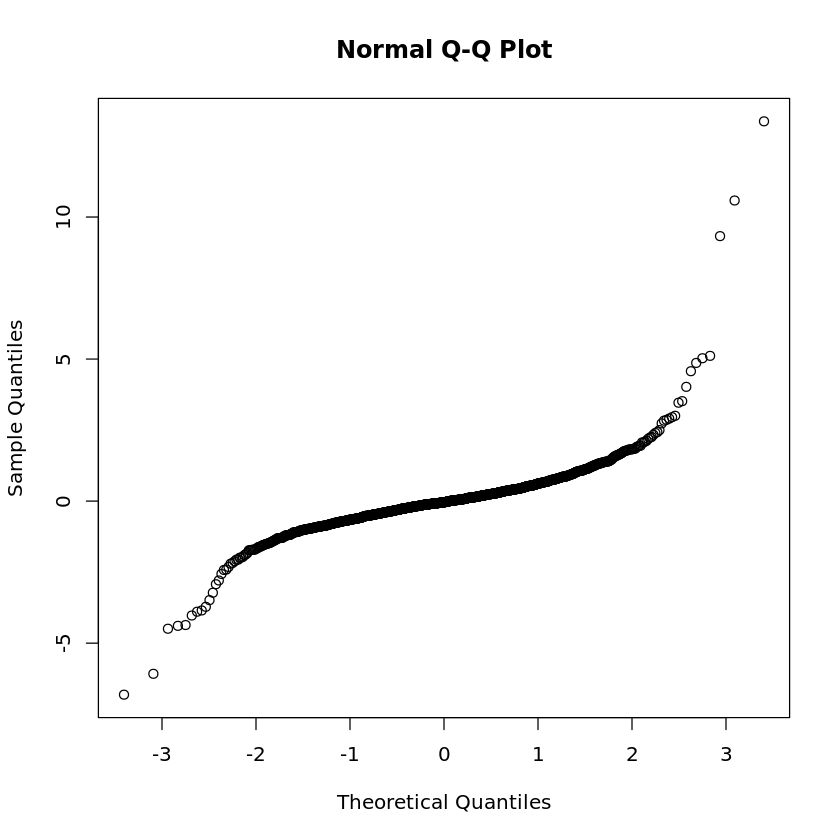

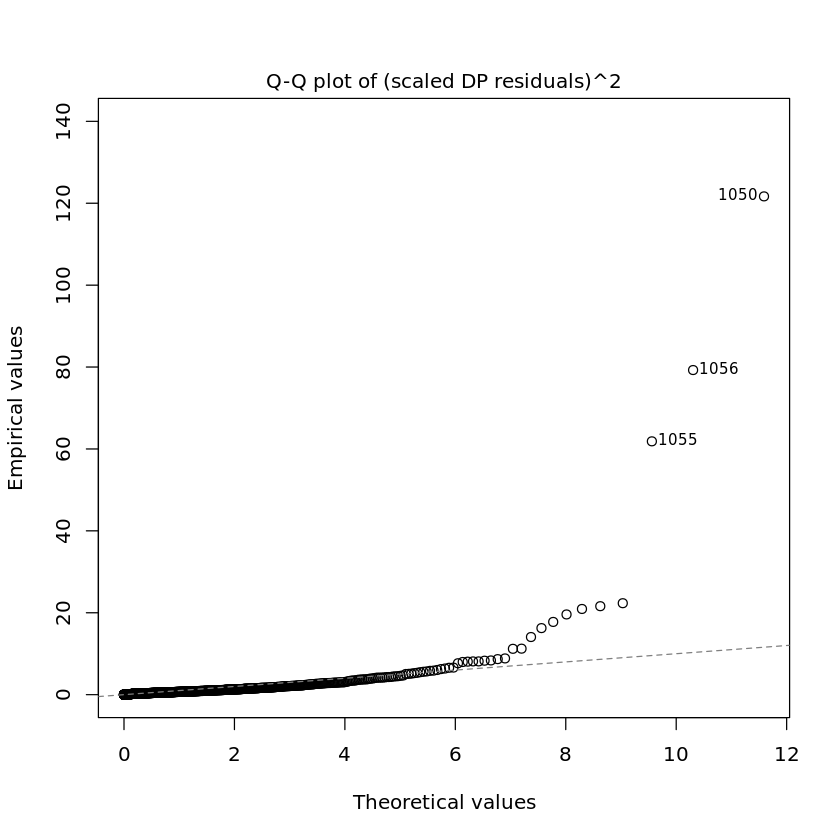

In [40]:
# QQ Plots for Residuals from Normal Regression and for Residuals from Skew-Normal Regression

# QQ of residuals from regular regression
qqnorm(rstandard(ex_lm)) 

# QQ from skew-normal regression
plot(ex_sn, which=3)  


Figure 10 shows the QQ plots for residuals for two models. The scales of the two QQ plots are different because of the CP-DP adjustment in skew-normal distribution. The interpretation is still the same. From the normal (least square) QQ plot on the top, we can see the data are all curvy on both ends of the graph. Only the middle part follows a straight line. However, the skew-normal QQ plot below seems to have a better fit. The left end of the data also fits well with the straight line. Only to the right of the graph do we see that the data curves up. We see this phenomenon because the actual data has a thicker right tail than a normal distribution. In the next section, we will introduce skew-t distribution to be able to handle heavier tails.


### **4.3 The Basics of Skew-t Distribution**

A **skew-t distribution** is like a Student’s t-distribution with the flexibility to adjust for the heaviness of the tails. Student’s t-distribution is a symmetric distribution that has heavier tails than normal distribution. Usually Student’s t-distribution is used when the data distribution is symmetric but the tails are thicker or longer than Normal distribution. In this section, we are going to introduce a distribution that is like Student’s t-distribution but can both handle skewness and kurtosis. This is skew-t distribution.


**Figure 11: Simulated Skew-t Distributions with Different Degrees of Freedom**


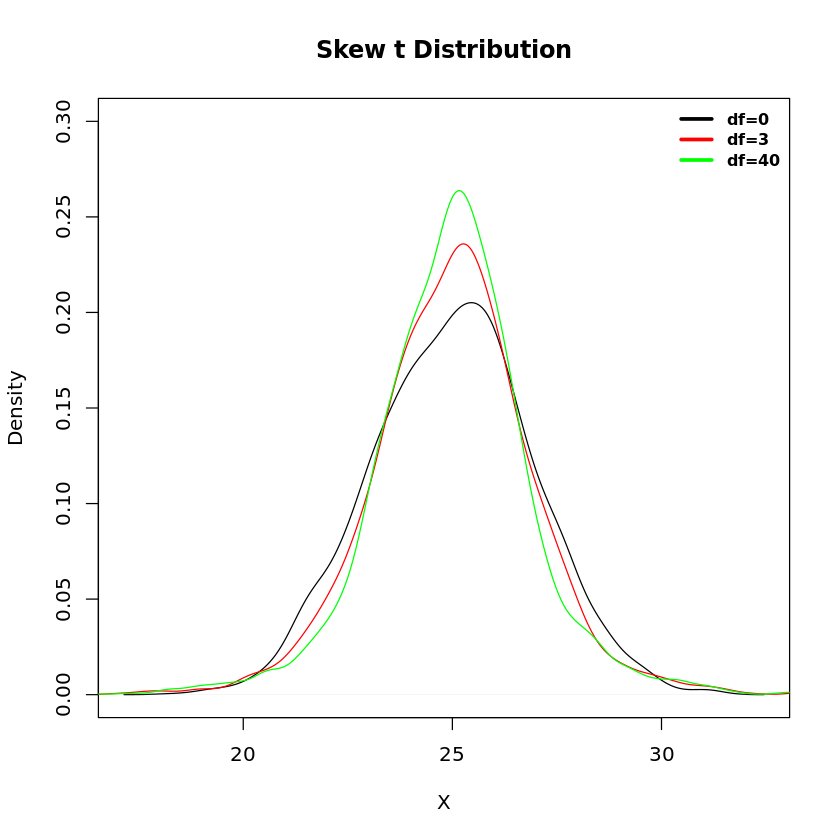

In [44]:
# Simulated Skew-t Distributions with Different Degrees of Freedom

# skew t distribution with df=0
set.seed(1234)
dpst1 <- cp2dp(c(25, 2, 0, 0), family="ST")
st1 <- rst(3000, dp=dpst1)

# skew t distribution with df=3
set.seed(1234)
dpst2 <- cp2dp(c(25, 2, 0, 3), family="ST")
st2 <- rst(3000, dp=dpst2)

# skew t distribution with df=40
set.seed(1234)
dpst3 <- cp2dp(c(25, 2, 0, 40), family="ST")
st3 <- rst(3000, dp=dpst3)

# Plot 3 skew t distributions
plot(density(st1), xlab="X", ylim=c(0,0.3), main="Skew t Distribution")
lines(density(st2), col='red')
lines(density(st3), col='green')
legend("topright", inset=c(-0.005,0),  c("df=0", "df=3", "df=40"),
       lty=rep(1, 3), bty="n", col=c("black","red","green"), 
       pt.cex=1, cex=0.8, text.font=2, lwd=3)


If $X$ is a continuous random variable, it’s skew-t density function is as follows:

$$ 2t (X; \nu) T(\alpha X; \nu) $$

Where 

> $\nu$ is degree of freedom, <br>
> $t(X; \nu)$ is the probability density function for Student’s t-distribution, <br>
> $T(\alpha X; \nu )$ is the cumulative probability distribution function for Student’s t-distribution.

Figure 11 shows three skew-t distributions with different degrees of freedom. The degree of freedom is a parameter for skew-t distribution to adjust the thickness of the tails. As the degree of freedom increases, the peak of the distribution gets thinner and the tails get heavier. Here are some properties of skew-t distribution:

> - When $\alpha =0$, skew-t distribution reduces to Student’s t-distribution.
> - When $\nu \to \infty$, skew-t distribution reduces to skew normal distribution
> - When $\alpha =0$ and $\nu \to \infty$, skew-t distribution reduces to standard normal distribution.

Similar to skew-normal distribution, skew-t distribution also has a CP-DP conversion adjustment. Let’s look at skew-t distribution’s CP and DP. Assume random variable $X$ has a skew-t distribution with mean = $\mu$, standard deviation = $\sigma$, skewness = $\gamma_{1}$ and kurtosis = $\gamma_{2}$, and we can denote $X$ as follows:

**Centered Parameters Method (CP)**: 

$$ X \sim ST(\mu, \sigma, \gamma_{1}, \gamma_{2}) $$ 

Where $\gamma_{1} < 0.995$

**Direct Parameters Method (DP)**: 

$$ X \sim ST(\xi, \omega, \alpha, \nu) $$

Where $\xi$ is location parameter, $\omega$ is scale parameter, $\alpha$ is shape parameter and $\nu$ is degree of freedom

Any statistical application can convert CP to DP and vice versa for skew-t distribution.


### **4.4 U.S. 10-Year Treasury Bond Yield Daily Return and Skew-t Distribution**

We tried to use skew-normal to fit the U.S. 10-Year Treasury Bond Yield Daily Return data in the last section. However, skew-normal distribution cannot describe well the heavy right tail nature of the U.S. 10-Year Treasury Bond Yield Daily Return data. In this section, let’s try skew-t distribution to see if this distribution can do a better job.


**Figure 12: QQ Plot Skew-t Distribution vs. U.S. Treasury 10-Year Bond Yield Daily Return**


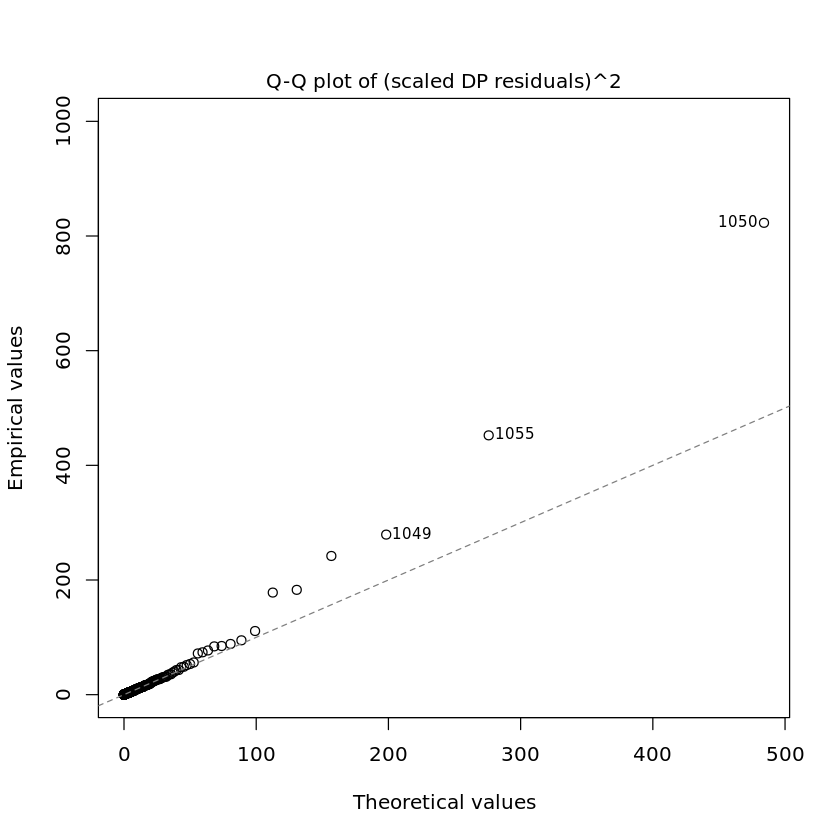

In [45]:
# QQ Plot Skew-t Distribution vs. U.S. Treasury 10-Year Bond Yield Daily Return

# Fit OLS with skew t error terms
X10Y_stfit <- selm(X10Y_TBY ~ 1, data=data_set, family='ST')

# QQ plot of residuals
plot(X10Y_stfit, which=3, param.type='DP')


From figure 12, we can see more data points rest on the straight line for the skew-t distribution QQ plot than the skew-normal distribution QQ plot in Figure 7. Skew-t distribution fits the U.S. Treasury 10-Year Bond Yield daily return data better than skew-normal distribution. There are fewer data points not on the straight line for skew-t distribution.

Now let’s run skew-t distribution regression of the U.S. Treasury 10-Year Bond Yield daily return on the Dow Jones Industrial Average daily return. Figure 13 shows the result from skew-t distribution regression.


**Figure 13: Skew-t Distribution Regression Result**


In [46]:
# Skew-t Distribution Regression Result

# Fit OLS with skew t error terms and print summary
ex_st <- selm(X10Y_TBY ~ DWJ, data=data_set, family="ST")
summary(ex_st, param.type='DP')


Call: selm(formula = X10Y_TBY ~ DWJ, family = "ST", data = data_set)
Number of observations: 1507 
Family: ST 
Estimation method: MLE
Log-likelihood: 3419.031 
Parameter type: DP 

DP residuals:
      Min        1Q    Median        3Q       Max 
-0.222990 -0.010489  0.002294  0.015836  0.449492 

Regression coefficients
                estimate   std.err   z-ratio Pr{>|z|}
(Intercept.DP) -0.003879  0.001727 -2.245821    0.025
DWJ             1.090937  0.078792 13.845841    0.000

Parameters of the SEC random component
      estimate std.err
omega  0.01671   0.001
alpha  0.17386   0.114
nu     2.59760   0.202

**Figure 14: QQ Plots for Residuals from Skew-Normal Regression and for Residuals from Skew-t Regression**


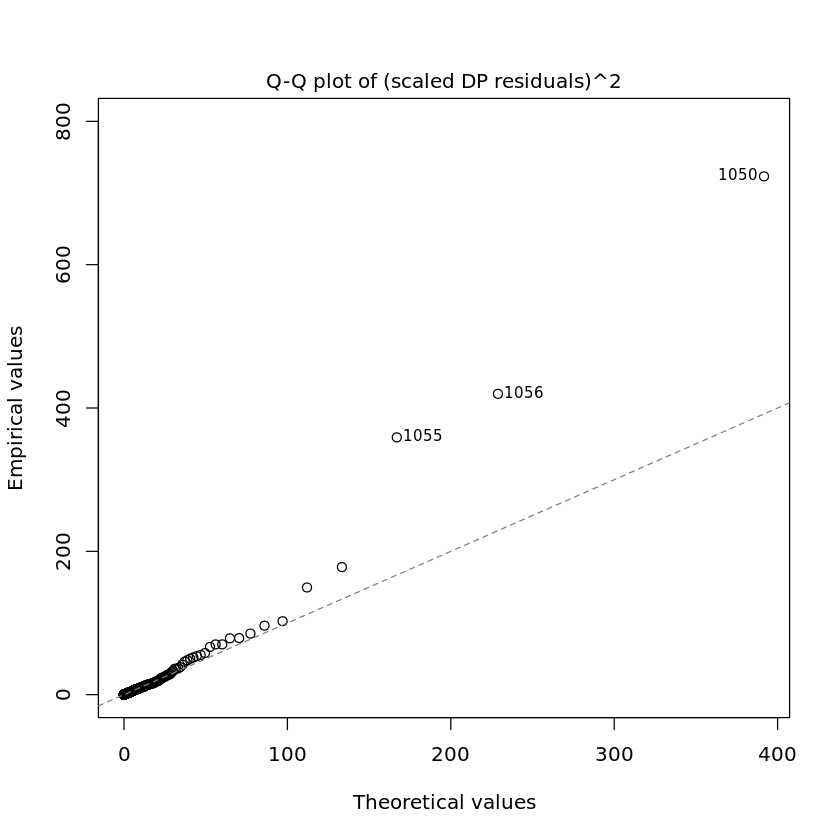

In [47]:
# QQ Plots for Residuals from Skew-Normal Regression and for Residuals from Skew-t Regression

plot(ex_st, which=3, param.type='DP')


From Figure 14, we can see skew-t distribution has a better regression fit for the right side of the regression residuals QQ plot than skew-normal distribution regression does. Also, the coefficient for the Dow Jones Industrial Average index daily return is much smaller (1.091 from figure 13) than in skew-normal distribution. It is more evidence that we should properly model the thicker tail for underlying data.


## **5. Conclusion**

In this lesson, we discussed what skewness and kurtosis are. We talked about the patterns of skewness and its measurement. We also talked about the patterns of kurtosis and its measurement. Built on the knowledge of skewness and kurtosis, we introduced skew normal distribution and skew-t distribution to handle normal distribution like a dataset but with skewness and thick tails. We went through the basics of skew normal distribution and skew-t distribution. We then applied these distributions to our U.S. Treasury Bond Yield and U.S. stock index example. In the next lesson, we will explore the metrics to calculate relationships among random variables. 


## **References**

Azzalini, Adelchi, and Antonella Capitanio. The Skew-Normal and Related Families. Cambridge University Press, IMS Monographs Series, 2014.


---
Copyright © 2022 WorldQuant University. 
This content is licensed solely for personal use. 
Redistribution or publication of this material is strictly prohibited.